In [79]:
from fastai import *
from fastai.vision import *
import IPython
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram
import librosa
import numpy as np
import pandas as pd
import glob
from pathlib import Path
import ntpath
from scipy import signal
from scipy.io import wavfile
from scipy.fftpack import fft

%matplotlib inline

In [63]:
print(os.path.basename('D:/Adithya/Datasets/ESC-50/audio/1-100032-A-0.wav'))

1-100032-A-0.wav


In [34]:
audio_path = 'D:/Adithya/Datasets/ESC-50/audio/'
label_csv = 'D:/Adithya/Datasets/ESC-50/meta/esc50.csv'

In [44]:
df = pd.read_csv(label_csv, usecols=['filename', 'target', 'category'], index_col=['filename'])
df.head()

,target,category
filename,,
1-100032-A-0.wav,0,dog
1-100038-A-14.wav,14,chirping_birds
1-100210-A-36.wav,36,vacuum_cleaner
1-100210-B-36.wav,36,vacuum_cleaner
1-101296-A-19.wav,19,thunderstorm


In [40]:
print("audio_path == " + audio_path)
waves = glob.glob(audio_path + '//*.wav')
#print(waves)
print(len(waves))

print(waves[0])

audio_path == D:/Adithya/Datasets/ESC-50/audio/
2000
D:/Adithya/Datasets/ESC-50/audio\1-100032-A-0.wav


In [59]:
for wave in glob.glob('D:/Adithya/Datasets/ESC-50/audio/*.wav'):
    print(wave)


D:/Adithya/Datasets/ESC-50/audio\1-100032-A-0.wav
D:/Adithya/Datasets/ESC-50/audio\1-100038-A-14.wav
D:/Adithya/Datasets/ESC-50/audio\1-100210-A-36.wav
D:/Adithya/Datasets/ESC-50/audio\1-100210-B-36.wav
D:/Adithya/Datasets/ESC-50/audio\1-101296-A-19.wav
D:/Adithya/Datasets/ESC-50/audio\1-101296-B-19.wav
D:/Adithya/Datasets/ESC-50/audio\1-101336-A-30.wav
D:/Adithya/Datasets/ESC-50/audio\1-101404-A-34.wav
D:/Adithya/Datasets/ESC-50/audio\1-103298-A-9.wav
D:/Adithya/Datasets/ESC-50/audio\1-103995-A-30.wav
D:/Adithya/Datasets/ESC-50/audio\1-103999-A-30.wav
D:/Adithya/Datasets/ESC-50/audio\1-104089-A-22.wav
D:/Adithya/Datasets/ESC-50/audio\1-104089-B-22.wav
D:/Adithya/Datasets/ESC-50/audio\1-105224-A-22.wav
D:/Adithya/Datasets/ESC-50/audio\1-110389-A-0.wav
D:/Adithya/Datasets/ESC-50/audio\1-110537-A-22.wav
D:/Adithya/Datasets/ESC-50/audio\1-115521-A-19.wav
D:/Adithya/Datasets/ESC-50/audio\1-115545-A-48.wav
D:/Adithya/Datasets/ESC-50/audio\1-115545-B-48.wav
D:/Adithya/Datasets/ESC-50/audio\1

D:/Adithya/Datasets/ESC-50/audio\3-155579-A-14.wav
D:/Adithya/Datasets/ESC-50/audio\3-155583-A-14.wav
D:/Adithya/Datasets/ESC-50/audio\3-155584-A-14.wav
D:/Adithya/Datasets/ESC-50/audio\3-155642-A-11.wav
D:/Adithya/Datasets/ESC-50/audio\3-155642-B-11.wav
D:/Adithya/Datasets/ESC-50/audio\3-155659-A-34.wav
D:/Adithya/Datasets/ESC-50/audio\3-155766-A-13.wav
D:/Adithya/Datasets/ESC-50/audio\3-156391-A-35.wav
D:/Adithya/Datasets/ESC-50/audio\3-156393-A-35.wav
D:/Adithya/Datasets/ESC-50/audio\3-156558-A-21.wav
D:/Adithya/Datasets/ESC-50/audio\3-156581-A-14.wav
D:/Adithya/Datasets/ESC-50/audio\3-156581-B-14.wav
D:/Adithya/Datasets/ESC-50/audio\3-156907-A-15.wav
D:/Adithya/Datasets/ESC-50/audio\3-157149-A-10.wav
D:/Adithya/Datasets/ESC-50/audio\3-157187-A-12.wav
D:/Adithya/Datasets/ESC-50/audio\3-157487-A-10.wav
D:/Adithya/Datasets/ESC-50/audio\3-157492-A-45.wav
D:/Adithya/Datasets/ESC-50/audio\3-157615-A-10.wav
D:/Adithya/Datasets/ESC-50/audio\3-157695-A-0.wav
D:/Adithya/Datasets/ESC-50/audio

In [41]:
def create_dir(dirname):
    if os.path.exists(dirname):
        pass
    else:
        os.makedirs(dirname)

In [42]:
def save_spectogram(file, output, figsize=(4,4)):

    freq, sound = wavfile.read(file)
    freq, time, specto = signal.spectrogram(sound)
    specto = 10*np.log(specto.astype(np.float32))
    
    fig = plt.figure(figsize=figsize, frameon=False) # make images 288x288
    ax = plt.Axes(fig, [0.,0.,1.,1.])
    ax.set_axis_off()
    fig.add_axes(ax)
    ax.pcolormesh(time/100, freq, specto)
    fig.savefig(output, dpi=100)
    plt.close()

In [60]:
for item in waves:
    print(item)
    name=item.split('//')[-1]
    print(name)
    print(df.loc[name].category)

D:/Adithya/Datasets/ESC-50/audio\1-100032-A-0.wav
D:/Adithya/Datasets/ESC-50/audio\1-100032-A-0.wav


KeyError: 'D:/Adithya/Datasets/ESC-50/audio\\1-100032-A-0.wav'

In [73]:
import matplotlib
matplotlib.use('Agg') #stop display output in ipython

for item in waves:
    print(item)
    name = os.path.basename(item)
    dirname = 'D:/Adithya/Datasets/ESC-50/prep/' + df.loc[name].category
    create_dir(dirname)
    out_file = dirname+ '/' + name.split('.wav')[0] + '.jpg'
    spectrogramFile = "D:/Adithya/Datasets/ESC-50/audio" + "/" + name
    print("------")

    print(spectrogramFile)
    save_spectogram(spectrogramFile, out_file)
    
print('done')

D:/Adithya/Datasets/ESC-50/audio\1-100032-A-0.wav
------
D:/Adithya/Datasets/ESC-50/audio/1-100032-A-0.wav


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


D:/Adithya/Datasets/ESC-50/audio\1-100038-A-14.wav
------
D:/Adithya/Datasets/ESC-50/audio/1-100038-A-14.wav
D:/Adithya/Datasets/ESC-50/audio\1-100210-A-36.wav
------
D:/Adithya/Datasets/ESC-50/audio/1-100210-A-36.wav
D:/Adithya/Datasets/ESC-50/audio\1-100210-B-36.wav
------
D:/Adithya/Datasets/ESC-50/audio/1-100210-B-36.wav
D:/Adithya/Datasets/ESC-50/audio\1-101296-A-19.wav
------
D:/Adithya/Datasets/ESC-50/audio/1-101296-A-19.wav
D:/Adithya/Datasets/ESC-50/audio\1-101296-B-19.wav
------
D:/Adithya/Datasets/ESC-50/audio/1-101296-B-19.wav
D:/Adithya/Datasets/ESC-50/audio\1-101336-A-30.wav
------
D:/Adithya/Datasets/ESC-50/audio/1-101336-A-30.wav
D:/Adithya/Datasets/ESC-50/audio\1-101404-A-34.wav
------
D:/Adithya/Datasets/ESC-50/audio/1-101404-A-34.wav
D:/Adithya/Datasets/ESC-50/audio\1-103298-A-9.wav
------
D:/Adithya/Datasets/ESC-50/audio/1-103298-A-9.wav
D:/Adithya/Datasets/ESC-50/audio\1-103995-A-30.wav
------
D:/Adithya/Datasets/ESC-50/audio/1-103995-A-30.wav
D:/Adithya/Datasets/E

D:/Adithya/Datasets/ESC-50/audio\1-187207-A-20.wav
------
D:/Adithya/Datasets/ESC-50/audio/1-187207-A-20.wav
D:/Adithya/Datasets/ESC-50/audio\1-18755-A-4.wav
------
D:/Adithya/Datasets/ESC-50/audio/1-18755-A-4.wav
D:/Adithya/Datasets/ESC-50/audio\1-18755-B-4.wav
------
D:/Adithya/Datasets/ESC-50/audio/1-18755-B-4.wav
D:/Adithya/Datasets/ESC-50/audio\1-18757-A-4.wav
------
D:/Adithya/Datasets/ESC-50/audio/1-18757-A-4.wav
D:/Adithya/Datasets/ESC-50/audio\1-18810-A-49.wav
------
D:/Adithya/Datasets/ESC-50/audio/1-18810-A-49.wav
D:/Adithya/Datasets/ESC-50/audio\1-19026-A-43.wav
------
D:/Adithya/Datasets/ESC-50/audio/1-19026-A-43.wav
D:/Adithya/Datasets/ESC-50/audio\1-19111-A-24.wav
------
D:/Adithya/Datasets/ESC-50/audio/1-19111-A-24.wav
D:/Adithya/Datasets/ESC-50/audio\1-19118-A-24.wav
------
D:/Adithya/Datasets/ESC-50/audio/1-19118-A-24.wav
D:/Adithya/Datasets/ESC-50/audio\1-19501-A-7.wav
------
D:/Adithya/Datasets/ESC-50/audio/1-19501-A-7.wav
D:/Adithya/Datasets/ESC-50/audio\1-196660-A

D:/Adithya/Datasets/ESC-50/audio\1-30043-A-26.wav
------
D:/Adithya/Datasets/ESC-50/audio/1-30043-A-26.wav
D:/Adithya/Datasets/ESC-50/audio\1-30214-A-18.wav
------
D:/Adithya/Datasets/ESC-50/audio/1-30214-A-18.wav
D:/Adithya/Datasets/ESC-50/audio\1-30226-A-0.wav
------
D:/Adithya/Datasets/ESC-50/audio/1-30226-A-0.wav
D:/Adithya/Datasets/ESC-50/audio\1-30344-A-0.wav
------
D:/Adithya/Datasets/ESC-50/audio/1-30344-A-0.wav
D:/Adithya/Datasets/ESC-50/audio\1-30709-A-23.wav
------
D:/Adithya/Datasets/ESC-50/audio/1-30709-A-23.wav
D:/Adithya/Datasets/ESC-50/audio\1-30709-B-23.wav
------
D:/Adithya/Datasets/ESC-50/audio/1-30709-B-23.wav
D:/Adithya/Datasets/ESC-50/audio\1-30709-C-23.wav
------
D:/Adithya/Datasets/ESC-50/audio/1-30709-C-23.wav
D:/Adithya/Datasets/ESC-50/audio\1-30830-A-24.wav
------
D:/Adithya/Datasets/ESC-50/audio/1-30830-A-24.wav
D:/Adithya/Datasets/ESC-50/audio\1-31251-A-6.wav
------
D:/Adithya/Datasets/ESC-50/audio/1-31251-A-6.wav
D:/Adithya/Datasets/ESC-50/audio\1-31251-B-

D:/Adithya/Datasets/ESC-50/audio\1-47923-A-28.wav
------
D:/Adithya/Datasets/ESC-50/audio/1-47923-A-28.wav
D:/Adithya/Datasets/ESC-50/audio\1-48298-A-46.wav
------
D:/Adithya/Datasets/ESC-50/audio/1-48298-A-46.wav
D:/Adithya/Datasets/ESC-50/audio\1-48413-A-38.wav
------
D:/Adithya/Datasets/ESC-50/audio/1-48413-A-38.wav
D:/Adithya/Datasets/ESC-50/audio\1-49098-A-35.wav
------
D:/Adithya/Datasets/ESC-50/audio/1-49098-A-35.wav
D:/Adithya/Datasets/ESC-50/audio\1-49409-A-8.wav
------
D:/Adithya/Datasets/ESC-50/audio/1-49409-A-8.wav
D:/Adithya/Datasets/ESC-50/audio\1-49409-B-8.wav
------
D:/Adithya/Datasets/ESC-50/audio/1-49409-B-8.wav
D:/Adithya/Datasets/ESC-50/audio\1-50060-A-10.wav
------
D:/Adithya/Datasets/ESC-50/audio/1-50060-A-10.wav
D:/Adithya/Datasets/ESC-50/audio\1-50454-A-44.wav
------
D:/Adithya/Datasets/ESC-50/audio/1-50454-A-44.wav
D:/Adithya/Datasets/ESC-50/audio\1-50455-A-44.wav
------
D:/Adithya/Datasets/ESC-50/audio/1-50455-A-44.wav
D:/Adithya/Datasets/ESC-50/audio\1-50623-

D:/Adithya/Datasets/ESC-50/audio\1-62594-A-32.wav
------
D:/Adithya/Datasets/ESC-50/audio/1-62594-A-32.wav
D:/Adithya/Datasets/ESC-50/audio\1-62849-A-38.wav
------
D:/Adithya/Datasets/ESC-50/audio/1-62849-A-38.wav
D:/Adithya/Datasets/ESC-50/audio\1-62850-A-38.wav
------
D:/Adithya/Datasets/ESC-50/audio/1-62850-A-38.wav
D:/Adithya/Datasets/ESC-50/audio\1-63679-A-24.wav
------
D:/Adithya/Datasets/ESC-50/audio/1-63679-A-24.wav
D:/Adithya/Datasets/ESC-50/audio\1-63871-A-10.wav
------
D:/Adithya/Datasets/ESC-50/audio/1-63871-A-10.wav
D:/Adithya/Datasets/ESC-50/audio\1-64398-A-41.wav
------
D:/Adithya/Datasets/ESC-50/audio/1-64398-A-41.wav
D:/Adithya/Datasets/ESC-50/audio\1-64398-B-41.wav
------
D:/Adithya/Datasets/ESC-50/audio/1-64398-B-41.wav
D:/Adithya/Datasets/ESC-50/audio\1-64473-A-45.wav
------
D:/Adithya/Datasets/ESC-50/audio/1-64473-A-45.wav
D:/Adithya/Datasets/ESC-50/audio\1-65483-A-13.wav
------
D:/Adithya/Datasets/ESC-50/audio/1-65483-A-13.wav
D:/Adithya/Datasets/ESC-50/audio\1-67

D:/Adithya/Datasets/ESC-50/audio\1-94231-A-32.wav
------
D:/Adithya/Datasets/ESC-50/audio/1-94231-A-32.wav
D:/Adithya/Datasets/ESC-50/audio\1-94231-B-32.wav
------
D:/Adithya/Datasets/ESC-50/audio/1-94231-B-32.wav
D:/Adithya/Datasets/ESC-50/audio\1-95563-A-31.wav
------
D:/Adithya/Datasets/ESC-50/audio/1-95563-A-31.wav
D:/Adithya/Datasets/ESC-50/audio\1-96890-A-37.wav
------
D:/Adithya/Datasets/ESC-50/audio/1-96890-A-37.wav
D:/Adithya/Datasets/ESC-50/audio\1-96950-A-9.wav
------
D:/Adithya/Datasets/ESC-50/audio/1-96950-A-9.wav
D:/Adithya/Datasets/ESC-50/audio\1-96950-B-9.wav
------
D:/Adithya/Datasets/ESC-50/audio/1-96950-B-9.wav
D:/Adithya/Datasets/ESC-50/audio\1-97392-A-0.wav
------
D:/Adithya/Datasets/ESC-50/audio/1-97392-A-0.wav
D:/Adithya/Datasets/ESC-50/audio\1-977-A-39.wav
------
D:/Adithya/Datasets/ESC-50/audio/1-977-A-39.wav
D:/Adithya/Datasets/ESC-50/audio\1-97793-A-31.wav
------
D:/Adithya/Datasets/ESC-50/audio/1-97793-A-31.wav
D:/Adithya/Datasets/ESC-50/audio\1-9841-A-13.wa

D:/Adithya/Datasets/ESC-50/audio\2-109371-C-16.wav
------
D:/Adithya/Datasets/ESC-50/audio/2-109371-C-16.wav
D:/Adithya/Datasets/ESC-50/audio\2-109371-D-16.wav
------
D:/Adithya/Datasets/ESC-50/audio/2-109371-D-16.wav
D:/Adithya/Datasets/ESC-50/audio\2-109374-A-16.wav
------
D:/Adithya/Datasets/ESC-50/audio/2-109374-A-16.wav
D:/Adithya/Datasets/ESC-50/audio\2-109505-A-21.wav
------
D:/Adithya/Datasets/ESC-50/audio/2-109505-A-21.wav
D:/Adithya/Datasets/ESC-50/audio\2-109759-A-26.wav
------
D:/Adithya/Datasets/ESC-50/audio/2-109759-A-26.wav
D:/Adithya/Datasets/ESC-50/audio\2-109759-B-26.wav
------
D:/Adithya/Datasets/ESC-50/audio/2-109759-B-26.wav
D:/Adithya/Datasets/ESC-50/audio\2-110010-A-5.wav
------
D:/Adithya/Datasets/ESC-50/audio/2-110010-A-5.wav
D:/Adithya/Datasets/ESC-50/audio\2-110011-A-5.wav
------
D:/Adithya/Datasets/ESC-50/audio/2-110011-A-5.wav
D:/Adithya/Datasets/ESC-50/audio\2-110417-A-28.wav
------
D:/Adithya/Datasets/ESC-50/audio/2-110417-A-28.wav
D:/Adithya/Datasets/ESC

D:/Adithya/Datasets/ESC-50/audio\2-127108-A-38.wav
------
D:/Adithya/Datasets/ESC-50/audio/2-127108-A-38.wav
D:/Adithya/Datasets/ESC-50/audio\2-127109-A-6.wav
------
D:/Adithya/Datasets/ESC-50/audio/2-127109-A-6.wav
D:/Adithya/Datasets/ESC-50/audio\2-128465-A-43.wav
------
D:/Adithya/Datasets/ESC-50/audio/2-128465-A-43.wav
D:/Adithya/Datasets/ESC-50/audio\2-128465-B-43.wav
------
D:/Adithya/Datasets/ESC-50/audio/2-128465-B-43.wav
D:/Adithya/Datasets/ESC-50/audio\2-128631-A-21.wav
------
D:/Adithya/Datasets/ESC-50/audio/2-128631-A-21.wav
D:/Adithya/Datasets/ESC-50/audio\2-130245-A-34.wav
------
D:/Adithya/Datasets/ESC-50/audio/2-130245-A-34.wav
D:/Adithya/Datasets/ESC-50/audio\2-130978-A-21.wav
------
D:/Adithya/Datasets/ESC-50/audio/2-130978-A-21.wav
D:/Adithya/Datasets/ESC-50/audio\2-130979-A-21.wav
------
D:/Adithya/Datasets/ESC-50/audio/2-130979-A-21.wav
D:/Adithya/Datasets/ESC-50/audio\2-131943-A-38.wav
------
D:/Adithya/Datasets/ESC-50/audio/2-131943-A-38.wav
D:/Adithya/Datasets/E

D:/Adithya/Datasets/ESC-50/audio\2-209477-A-25.wav
------
D:/Adithya/Datasets/ESC-50/audio/2-209477-A-25.wav
D:/Adithya/Datasets/ESC-50/audio\2-209478-A-25.wav
------
D:/Adithya/Datasets/ESC-50/audio/2-209478-A-25.wav
D:/Adithya/Datasets/ESC-50/audio\2-250710-A-39.wav
------
D:/Adithya/Datasets/ESC-50/audio/2-250710-A-39.wav
D:/Adithya/Datasets/ESC-50/audio\2-25292-A-22.wav
------
D:/Adithya/Datasets/ESC-50/audio/2-25292-A-22.wav
D:/Adithya/Datasets/ESC-50/audio\2-25293-A-22.wav
------
D:/Adithya/Datasets/ESC-50/audio/2-25293-A-22.wav
D:/Adithya/Datasets/ESC-50/audio\2-262579-A-45.wav
------
D:/Adithya/Datasets/ESC-50/audio/2-262579-A-45.wav
D:/Adithya/Datasets/ESC-50/audio\2-28314-A-12.wav
------
D:/Adithya/Datasets/ESC-50/audio/2-28314-A-12.wav
D:/Adithya/Datasets/ESC-50/audio\2-28314-B-12.wav
------
D:/Adithya/Datasets/ESC-50/audio/2-28314-B-12.wav
D:/Adithya/Datasets/ESC-50/audio\2-30322-A-12.wav
------
D:/Adithya/Datasets/ESC-50/audio/2-30322-A-12.wav
D:/Adithya/Datasets/ESC-50/au

D:/Adithya/Datasets/ESC-50/audio\2-69131-B-5.wav
------
D:/Adithya/Datasets/ESC-50/audio/2-69131-B-5.wav
D:/Adithya/Datasets/ESC-50/audio\2-70052-A-42.wav
------
D:/Adithya/Datasets/ESC-50/audio/2-70052-A-42.wav
D:/Adithya/Datasets/ESC-50/audio\2-70052-B-42.wav
------
D:/Adithya/Datasets/ESC-50/audio/2-70052-B-42.wav
D:/Adithya/Datasets/ESC-50/audio\2-70280-A-18.wav
------
D:/Adithya/Datasets/ESC-50/audio/2-70280-A-18.wav
D:/Adithya/Datasets/ESC-50/audio\2-70344-A-33.wav
------
D:/Adithya/Datasets/ESC-50/audio/2-70344-A-33.wav
D:/Adithya/Datasets/ESC-50/audio\2-70366-A-33.wav
------
D:/Adithya/Datasets/ESC-50/audio/2-70366-A-33.wav
D:/Adithya/Datasets/ESC-50/audio\2-70367-A-33.wav
------
D:/Adithya/Datasets/ESC-50/audio/2-70367-A-33.wav
D:/Adithya/Datasets/ESC-50/audio\2-70936-A-42.wav
------
D:/Adithya/Datasets/ESC-50/audio/2-70936-A-42.wav
D:/Adithya/Datasets/ESC-50/audio\2-70938-A-42.wav
------
D:/Adithya/Datasets/ESC-50/audio/2-70938-A-42.wav
D:/Adithya/Datasets/ESC-50/audio\2-7093

D:/Adithya/Datasets/ESC-50/audio\2-87780-A-33.wav
------
D:/Adithya/Datasets/ESC-50/audio/2-87780-A-33.wav
D:/Adithya/Datasets/ESC-50/audio\2-87781-A-10.wav
------
D:/Adithya/Datasets/ESC-50/audio/2-87781-A-10.wav
D:/Adithya/Datasets/ESC-50/audio\2-87794-A-24.wav
------
D:/Adithya/Datasets/ESC-50/audio/2-87794-A-24.wav
D:/Adithya/Datasets/ESC-50/audio\2-87795-A-24.wav
------
D:/Adithya/Datasets/ESC-50/audio/2-87795-A-24.wav
D:/Adithya/Datasets/ESC-50/audio\2-87799-A-24.wav
------
D:/Adithya/Datasets/ESC-50/audio/2-87799-A-24.wav
D:/Adithya/Datasets/ESC-50/audio\2-88724-A-38.wav
------
D:/Adithya/Datasets/ESC-50/audio/2-88724-A-38.wav
D:/Adithya/Datasets/ESC-50/audio\2-89516-A-37.wav
------
D:/Adithya/Datasets/ESC-50/audio/2-89516-A-37.wav
D:/Adithya/Datasets/ESC-50/audio\2-91912-A-33.wav
------
D:/Adithya/Datasets/ESC-50/audio/2-91912-A-33.wav
D:/Adithya/Datasets/ESC-50/audio\2-91912-B-33.wav
------
D:/Adithya/Datasets/ESC-50/audio/2-91912-B-33.wav
D:/Adithya/Datasets/ESC-50/audio\2-92

D:/Adithya/Datasets/ESC-50/audio\3-115387-A-47.wav
------
D:/Adithya/Datasets/ESC-50/audio/3-115387-A-47.wav
D:/Adithya/Datasets/ESC-50/audio\3-115387-B-47.wav
------
D:/Adithya/Datasets/ESC-50/audio/3-115387-B-47.wav
D:/Adithya/Datasets/ESC-50/audio\3-115387-C-47.wav
------
D:/Adithya/Datasets/ESC-50/audio/3-115387-C-47.wav
D:/Adithya/Datasets/ESC-50/audio\3-116135-A-1.wav
------
D:/Adithya/Datasets/ESC-50/audio/3-116135-A-1.wav
D:/Adithya/Datasets/ESC-50/audio\3-117293-A-9.wav
------
D:/Adithya/Datasets/ESC-50/audio/3-117293-A-9.wav
D:/Adithya/Datasets/ESC-50/audio\3-117504-A-16.wav
------
D:/Adithya/Datasets/ESC-50/audio/3-117504-A-16.wav
D:/Adithya/Datasets/ESC-50/audio\3-117504-B-16.wav
------
D:/Adithya/Datasets/ESC-50/audio/3-117504-B-16.wav
D:/Adithya/Datasets/ESC-50/audio\3-117793-A-37.wav
------
D:/Adithya/Datasets/ESC-50/audio/3-117793-A-37.wav
D:/Adithya/Datasets/ESC-50/audio\3-117883-A-37.wav
------
D:/Adithya/Datasets/ESC-50/audio/3-117883-A-37.wav
D:/Adithya/Datasets/ESC

D:/Adithya/Datasets/ESC-50/audio\3-136451-A-45.wav
------
D:/Adithya/Datasets/ESC-50/audio/3-136451-A-45.wav
D:/Adithya/Datasets/ESC-50/audio\3-136608-A-16.wav
------
D:/Adithya/Datasets/ESC-50/audio/3-136608-A-16.wav
D:/Adithya/Datasets/ESC-50/audio\3-137152-A-1.wav
------
D:/Adithya/Datasets/ESC-50/audio/3-137152-A-1.wav
D:/Adithya/Datasets/ESC-50/audio\3-138114-A-22.wav
------
D:/Adithya/Datasets/ESC-50/audio/3-138114-A-22.wav
D:/Adithya/Datasets/ESC-50/audio\3-138212-A-45.wav
------
D:/Adithya/Datasets/ESC-50/audio/3-138212-A-45.wav
D:/Adithya/Datasets/ESC-50/audio\3-139109-A-46.wav
------
D:/Adithya/Datasets/ESC-50/audio/3-139109-A-46.wav
D:/Adithya/Datasets/ESC-50/audio\3-139331-A-27.wav
------
D:/Adithya/Datasets/ESC-50/audio/3-139331-A-27.wav
D:/Adithya/Datasets/ESC-50/audio\3-139958-A-37.wav
------
D:/Adithya/Datasets/ESC-50/audio/3-139958-A-37.wav
D:/Adithya/Datasets/ESC-50/audio\3-140199-A-8.wav
------
D:/Adithya/Datasets/ESC-50/audio/3-140199-A-8.wav
D:/Adithya/Datasets/ESC

D:/Adithya/Datasets/ESC-50/audio\3-151213-A-24.wav
------
D:/Adithya/Datasets/ESC-50/audio/3-151213-A-24.wav
D:/Adithya/Datasets/ESC-50/audio\3-151255-A-28.wav
------
D:/Adithya/Datasets/ESC-50/audio/3-151255-A-28.wav
D:/Adithya/Datasets/ESC-50/audio\3-151269-A-35.wav
------
D:/Adithya/Datasets/ESC-50/audio/3-151269-A-35.wav
D:/Adithya/Datasets/ESC-50/audio\3-151273-A-35.wav
------
D:/Adithya/Datasets/ESC-50/audio/3-151273-A-35.wav
D:/Adithya/Datasets/ESC-50/audio\3-151557-A-28.wav
------
D:/Adithya/Datasets/ESC-50/audio/3-151557-A-28.wav
D:/Adithya/Datasets/ESC-50/audio\3-151557-B-28.wav
------
D:/Adithya/Datasets/ESC-50/audio/3-151557-B-28.wav
D:/Adithya/Datasets/ESC-50/audio\3-152007-A-20.wav
------
D:/Adithya/Datasets/ESC-50/audio/3-152007-A-20.wav
D:/Adithya/Datasets/ESC-50/audio\3-152007-B-20.wav
------
D:/Adithya/Datasets/ESC-50/audio/3-152007-B-20.wav
D:/Adithya/Datasets/ESC-50/audio\3-152007-C-20.wav
------
D:/Adithya/Datasets/ESC-50/audio/3-152007-C-20.wav
D:/Adithya/Datasets

D:/Adithya/Datasets/ESC-50/audio\3-164216-A-6.wav
------
D:/Adithya/Datasets/ESC-50/audio/3-164216-A-6.wav
D:/Adithya/Datasets/ESC-50/audio\3-164216-B-6.wav
------
D:/Adithya/Datasets/ESC-50/audio/3-164216-B-6.wav
D:/Adithya/Datasets/ESC-50/audio\3-164216-C-6.wav
------
D:/Adithya/Datasets/ESC-50/audio/3-164216-C-6.wav
D:/Adithya/Datasets/ESC-50/audio\3-164592-A-15.wav
------
D:/Adithya/Datasets/ESC-50/audio/3-164592-A-15.wav
D:/Adithya/Datasets/ESC-50/audio\3-164593-A-15.wav
------
D:/Adithya/Datasets/ESC-50/audio/3-164593-A-15.wav
D:/Adithya/Datasets/ESC-50/audio\3-164594-A-15.wav
------
D:/Adithya/Datasets/ESC-50/audio/3-164594-A-15.wav
D:/Adithya/Datasets/ESC-50/audio\3-164595-A-15.wav
------
D:/Adithya/Datasets/ESC-50/audio/3-164595-A-15.wav
D:/Adithya/Datasets/ESC-50/audio\3-164630-A-11.wav
------
D:/Adithya/Datasets/ESC-50/audio/3-164630-A-11.wav
D:/Adithya/Datasets/ESC-50/audio\3-164688-A-38.wav
------
D:/Adithya/Datasets/ESC-50/audio/3-164688-A-38.wav
D:/Adithya/Datasets/ESC-5

D:/Adithya/Datasets/ESC-50/audio\3-253081-A-2.wav
------
D:/Adithya/Datasets/ESC-50/audio/3-253081-A-2.wav
D:/Adithya/Datasets/ESC-50/audio\3-253084-A-2.wav
------
D:/Adithya/Datasets/ESC-50/audio/3-253084-A-2.wav
D:/Adithya/Datasets/ESC-50/audio\3-253084-B-2.wav
------
D:/Adithya/Datasets/ESC-50/audio/3-253084-B-2.wav
D:/Adithya/Datasets/ESC-50/audio\3-253084-C-2.wav
------
D:/Adithya/Datasets/ESC-50/audio/3-253084-C-2.wav
D:/Adithya/Datasets/ESC-50/audio\3-253084-D-2.wav
------
D:/Adithya/Datasets/ESC-50/audio/3-253084-D-2.wav
D:/Adithya/Datasets/ESC-50/audio\3-253084-E-2.wav
------
D:/Adithya/Datasets/ESC-50/audio/3-253084-E-2.wav
D:/Adithya/Datasets/ESC-50/audio\3-257858-A-2.wav
------
D:/Adithya/Datasets/ESC-50/audio/3-257858-A-2.wav
D:/Adithya/Datasets/ESC-50/audio\3-259622-A-44.wav
------
D:/Adithya/Datasets/ESC-50/audio/3-259622-A-44.wav
D:/Adithya/Datasets/ESC-50/audio\3-51376-A-42.wav
------
D:/Adithya/Datasets/ESC-50/audio/3-51376-A-42.wav
D:/Adithya/Datasets/ESC-50/audio\3-

D:/Adithya/Datasets/ESC-50/audio\4-126046-A-18.wav
------
D:/Adithya/Datasets/ESC-50/audio/4-126046-A-18.wav
D:/Adithya/Datasets/ESC-50/audio\4-126532-A-18.wav
------
D:/Adithya/Datasets/ESC-50/audio/4-126532-A-18.wav
D:/Adithya/Datasets/ESC-50/audio\4-128659-A-33.wav
------
D:/Adithya/Datasets/ESC-50/audio/4-128659-A-33.wav
D:/Adithya/Datasets/ESC-50/audio\4-130584-A-4.wav
------
D:/Adithya/Datasets/ESC-50/audio/4-130584-A-4.wav
D:/Adithya/Datasets/ESC-50/audio\4-130891-A-7.wav
------
D:/Adithya/Datasets/ESC-50/audio/4-130891-A-7.wav
D:/Adithya/Datasets/ESC-50/audio\4-132383-A-2.wav
------
D:/Adithya/Datasets/ESC-50/audio/4-132383-A-2.wav
D:/Adithya/Datasets/ESC-50/audio\4-132383-B-2.wav
------
D:/Adithya/Datasets/ESC-50/audio/4-132383-B-2.wav
D:/Adithya/Datasets/ESC-50/audio\4-132803-A-26.wav
------
D:/Adithya/Datasets/ESC-50/audio/4-132803-A-26.wav
D:/Adithya/Datasets/ESC-50/audio\4-132810-A-26.wav
------
D:/Adithya/Datasets/ESC-50/audio/4-132810-A-26.wav
D:/Adithya/Datasets/ESC-50/

D:/Adithya/Datasets/ESC-50/audio\4-161303-B-5.wav
------
D:/Adithya/Datasets/ESC-50/audio/4-161303-B-5.wav
D:/Adithya/Datasets/ESC-50/audio\4-161519-A-19.wav
------
D:/Adithya/Datasets/ESC-50/audio/4-161519-A-19.wav
D:/Adithya/Datasets/ESC-50/audio\4-161579-A-40.wav
------
D:/Adithya/Datasets/ESC-50/audio/4-161579-A-40.wav
D:/Adithya/Datasets/ESC-50/audio\4-161579-B-40.wav
------
D:/Adithya/Datasets/ESC-50/audio/4-161579-B-40.wav
D:/Adithya/Datasets/ESC-50/audio\4-163264-A-10.wav
------
D:/Adithya/Datasets/ESC-50/audio/4-163264-A-10.wav
D:/Adithya/Datasets/ESC-50/audio\4-163606-A-16.wav
------
D:/Adithya/Datasets/ESC-50/audio/4-163606-A-16.wav
D:/Adithya/Datasets/ESC-50/audio\4-163608-B-16.wav
------
D:/Adithya/Datasets/ESC-50/audio/4-163608-B-16.wav
D:/Adithya/Datasets/ESC-50/audio\4-163609-A-16.wav
------
D:/Adithya/Datasets/ESC-50/audio/4-163609-A-16.wav
D:/Adithya/Datasets/ESC-50/audio\4-163609-B-16.wav
------
D:/Adithya/Datasets/ESC-50/audio/4-163609-B-16.wav
D:/Adithya/Datasets/E

D:/Adithya/Datasets/ESC-50/audio\4-175025-A-34.wav
------
D:/Adithya/Datasets/ESC-50/audio/4-175025-A-34.wav
D:/Adithya/Datasets/ESC-50/audio\4-175845-A-43.wav
------
D:/Adithya/Datasets/ESC-50/audio/4-175845-A-43.wav
D:/Adithya/Datasets/ESC-50/audio\4-175846-A-43.wav
------
D:/Adithya/Datasets/ESC-50/audio/4-175846-A-43.wav
D:/Adithya/Datasets/ESC-50/audio\4-175855-A-43.wav
------
D:/Adithya/Datasets/ESC-50/audio/4-175855-A-43.wav
D:/Adithya/Datasets/ESC-50/audio\4-175856-A-43.wav
------
D:/Adithya/Datasets/ESC-50/audio/4-175856-A-43.wav
D:/Adithya/Datasets/ESC-50/audio\4-175945-A-38.wav
------
D:/Adithya/Datasets/ESC-50/audio/4-175945-A-38.wav
D:/Adithya/Datasets/ESC-50/audio\4-176631-A-43.wav
------
D:/Adithya/Datasets/ESC-50/audio/4-176631-A-43.wav
D:/Adithya/Datasets/ESC-50/audio\4-176638-A-43.wav
------
D:/Adithya/Datasets/ESC-50/audio/4-176638-A-43.wav
D:/Adithya/Datasets/ESC-50/audio\4-176914-A-23.wav
------
D:/Adithya/Datasets/ESC-50/audio/4-176914-A-23.wav
D:/Adithya/Datasets

D:/Adithya/Datasets/ESC-50/audio\4-188287-A-9.wav
------
D:/Adithya/Datasets/ESC-50/audio/4-188287-A-9.wav
D:/Adithya/Datasets/ESC-50/audio\4-188293-A-15.wav
------
D:/Adithya/Datasets/ESC-50/audio/4-188293-A-15.wav
D:/Adithya/Datasets/ESC-50/audio\4-188293-B-15.wav
------
D:/Adithya/Datasets/ESC-50/audio/4-188293-B-15.wav
D:/Adithya/Datasets/ESC-50/audio\4-188595-A-29.wav
------
D:/Adithya/Datasets/ESC-50/audio/4-188595-A-29.wav
D:/Adithya/Datasets/ESC-50/audio\4-188703-A-8.wav
------
D:/Adithya/Datasets/ESC-50/audio/4-188703-A-8.wav
D:/Adithya/Datasets/ESC-50/audio\4-188703-B-8.wav
------
D:/Adithya/Datasets/ESC-50/audio/4-188703-B-8.wav
D:/Adithya/Datasets/ESC-50/audio\4-188703-C-8.wav
------
D:/Adithya/Datasets/ESC-50/audio/4-188703-C-8.wav
D:/Adithya/Datasets/ESC-50/audio\4-188703-D-8.wav
------
D:/Adithya/Datasets/ESC-50/audio/4-188703-D-8.wav
D:/Adithya/Datasets/ESC-50/audio\4-188878-A-30.wav
------
D:/Adithya/Datasets/ESC-50/audio/4-188878-A-30.wav
D:/Adithya/Datasets/ESC-50/au

D:/Adithya/Datasets/ESC-50/audio\4-205526-B-23.wav
------
D:/Adithya/Datasets/ESC-50/audio/4-205526-B-23.wav
D:/Adithya/Datasets/ESC-50/audio\4-205738-A-22.wav
------
D:/Adithya/Datasets/ESC-50/audio/4-205738-A-22.wav
D:/Adithya/Datasets/ESC-50/audio\4-207116-A-23.wav
------
D:/Adithya/Datasets/ESC-50/audio/4-207116-A-23.wav
D:/Adithya/Datasets/ESC-50/audio\4-207124-A-0.wav
------
D:/Adithya/Datasets/ESC-50/audio/4-207124-A-0.wav
D:/Adithya/Datasets/ESC-50/audio\4-208021-A-1.wav
------
D:/Adithya/Datasets/ESC-50/audio/4-208021-A-1.wav
D:/Adithya/Datasets/ESC-50/audio\4-209536-A-37.wav
------
D:/Adithya/Datasets/ESC-50/audio/4-209536-A-37.wav
D:/Adithya/Datasets/ESC-50/audio\4-209698-A-37.wav
------
D:/Adithya/Datasets/ESC-50/audio/4-209698-A-37.wav
D:/Adithya/Datasets/ESC-50/audio\4-210000-A-23.wav
------
D:/Adithya/Datasets/ESC-50/audio/4-210000-A-23.wav
D:/Adithya/Datasets/ESC-50/audio\4-210000-B-23.wav
------
D:/Adithya/Datasets/ESC-50/audio/4-210000-B-23.wav
D:/Adithya/Datasets/ESC

D:/Adithya/Datasets/ESC-50/audio\5-133989-B-42.wav
------
D:/Adithya/Datasets/ESC-50/audio/5-133989-B-42.wav
D:/Adithya/Datasets/ESC-50/audio\5-141683-A-35.wav
------
D:/Adithya/Datasets/ESC-50/audio/5-141683-A-35.wav
D:/Adithya/Datasets/ESC-50/audio\5-147297-A-27.wav
------
D:/Adithya/Datasets/ESC-50/audio/5-147297-A-27.wav
D:/Adithya/Datasets/ESC-50/audio\5-150409-A-42.wav
------
D:/Adithya/Datasets/ESC-50/audio/5-150409-A-42.wav
D:/Adithya/Datasets/ESC-50/audio\5-151085-A-20.wav
------
D:/Adithya/Datasets/ESC-50/audio/5-151085-A-20.wav
D:/Adithya/Datasets/ESC-50/audio\5-156026-A-4.wav
------
D:/Adithya/Datasets/ESC-50/audio/5-156026-A-4.wav
D:/Adithya/Datasets/ESC-50/audio\5-156026-B-4.wav
------
D:/Adithya/Datasets/ESC-50/audio/5-156026-B-4.wav
D:/Adithya/Datasets/ESC-50/audio\5-156026-C-4.wav
------
D:/Adithya/Datasets/ESC-50/audio/5-156026-C-4.wav
D:/Adithya/Datasets/ESC-50/audio\5-156026-D-4.wav
------
D:/Adithya/Datasets/ESC-50/audio/5-156026-D-4.wav
D:/Adithya/Datasets/ESC-50/

D:/Adithya/Datasets/ESC-50/audio\5-188495-A-19.wav
------
D:/Adithya/Datasets/ESC-50/audio/5-188495-A-19.wav
D:/Adithya/Datasets/ESC-50/audio\5-188606-A-33.wav
------
D:/Adithya/Datasets/ESC-50/audio/5-188606-A-33.wav
D:/Adithya/Datasets/ESC-50/audio\5-188655-A-10.wav
------
D:/Adithya/Datasets/ESC-50/audio/5-188655-A-10.wav
D:/Adithya/Datasets/ESC-50/audio\5-188716-A-46.wav
------
D:/Adithya/Datasets/ESC-50/audio/5-188716-A-46.wav
D:/Adithya/Datasets/ESC-50/audio\5-188796-A-45.wav
------
D:/Adithya/Datasets/ESC-50/audio/5-188796-A-45.wav
D:/Adithya/Datasets/ESC-50/audio\5-188945-A-45.wav
------
D:/Adithya/Datasets/ESC-50/audio/5-188945-A-45.wav
D:/Adithya/Datasets/ESC-50/audio\5-189212-A-12.wav
------
D:/Adithya/Datasets/ESC-50/audio/5-189212-A-12.wav
D:/Adithya/Datasets/ESC-50/audio\5-189237-A-12.wav
------
D:/Adithya/Datasets/ESC-50/audio/5-189237-A-12.wav
D:/Adithya/Datasets/ESC-50/audio\5-189795-A-4.wav
------
D:/Adithya/Datasets/ESC-50/audio/5-189795-A-4.wav
D:/Adithya/Datasets/E

D:/Adithya/Datasets/ESC-50/audio\5-204352-B-13.wav
------
D:/Adithya/Datasets/ESC-50/audio/5-204352-B-13.wav
D:/Adithya/Datasets/ESC-50/audio\5-204604-A-24.wav
------
D:/Adithya/Datasets/ESC-50/audio/5-204604-A-24.wav
D:/Adithya/Datasets/ESC-50/audio\5-204741-A-46.wav
------
D:/Adithya/Datasets/ESC-50/audio/5-204741-A-46.wav
D:/Adithya/Datasets/ESC-50/audio\5-205090-A-32.wav
------
D:/Adithya/Datasets/ESC-50/audio/5-205090-A-32.wav
D:/Adithya/Datasets/ESC-50/audio\5-205589-A-17.wav
------
D:/Adithya/Datasets/ESC-50/audio/5-205589-A-17.wav
D:/Adithya/Datasets/ESC-50/audio\5-205589-B-17.wav
------
D:/Adithya/Datasets/ESC-50/audio/5-205589-B-17.wav
D:/Adithya/Datasets/ESC-50/audio\5-205898-A-40.wav
------
D:/Adithya/Datasets/ESC-50/audio/5-205898-A-40.wav
D:/Adithya/Datasets/ESC-50/audio\5-207681-A-24.wav
------
D:/Adithya/Datasets/ESC-50/audio/5-207681-A-24.wav
D:/Adithya/Datasets/ESC-50/audio\5-207781-A-17.wav
------
D:/Adithya/Datasets/ESC-50/audio/5-207781-A-17.wav
D:/Adithya/Datasets

D:/Adithya/Datasets/ESC-50/audio\5-219242-A-37.wav
------
D:/Adithya/Datasets/ESC-50/audio/5-219242-A-37.wav
D:/Adithya/Datasets/ESC-50/audio\5-219242-B-37.wav
------
D:/Adithya/Datasets/ESC-50/audio/5-219242-B-37.wav
D:/Adithya/Datasets/ESC-50/audio\5-219318-A-31.wav
------
D:/Adithya/Datasets/ESC-50/audio/5-219318-A-31.wav
D:/Adithya/Datasets/ESC-50/audio\5-219342-A-38.wav
------
D:/Adithya/Datasets/ESC-50/audio/5-219342-A-38.wav
D:/Adithya/Datasets/ESC-50/audio\5-219379-A-11.wav
------
D:/Adithya/Datasets/ESC-50/audio/5-219379-A-11.wav
D:/Adithya/Datasets/ESC-50/audio\5-219379-B-11.wav
------
D:/Adithya/Datasets/ESC-50/audio/5-219379-B-11.wav
D:/Adithya/Datasets/ESC-50/audio\5-219379-C-11.wav
------
D:/Adithya/Datasets/ESC-50/audio/5-219379-C-11.wav
D:/Adithya/Datasets/ESC-50/audio\5-220026-A-21.wav
------
D:/Adithya/Datasets/ESC-50/audio/5-220026-A-21.wav
D:/Adithya/Datasets/ESC-50/audio\5-220027-A-21.wav
------
D:/Adithya/Datasets/ESC-50/audio/5-220027-A-21.wav
D:/Adithya/Datasets

D:/Adithya/Datasets/ESC-50/audio\5-243450-A-14.wav
------
D:/Adithya/Datasets/ESC-50/audio/5-243450-A-14.wav
D:/Adithya/Datasets/ESC-50/audio\5-243459-A-14.wav
------
D:/Adithya/Datasets/ESC-50/audio/5-243459-A-14.wav
D:/Adithya/Datasets/ESC-50/audio\5-243459-B-14.wav
------
D:/Adithya/Datasets/ESC-50/audio/5-243459-B-14.wav
D:/Adithya/Datasets/ESC-50/audio\5-243635-A-29.wav
------
D:/Adithya/Datasets/ESC-50/audio/5-243635-A-29.wav
D:/Adithya/Datasets/ESC-50/audio\5-243773-A-44.wav
------
D:/Adithya/Datasets/ESC-50/audio/5-243773-A-44.wav
D:/Adithya/Datasets/ESC-50/audio\5-243773-B-44.wav
------
D:/Adithya/Datasets/ESC-50/audio/5-243773-B-44.wav
D:/Adithya/Datasets/ESC-50/audio\5-243783-A-44.wav
------
D:/Adithya/Datasets/ESC-50/audio/5-243783-A-44.wav
D:/Adithya/Datasets/ESC-50/audio\5-244178-A-32.wav
------
D:/Adithya/Datasets/ESC-50/audio/5-244178-A-32.wav
D:/Adithya/Datasets/ESC-50/audio\5-244310-A-25.wav
------
D:/Adithya/Datasets/ESC-50/audio/5-244310-A-25.wav
D:/Adithya/Datasets

D:/Adithya/Datasets/ESC-50/audio\5-263902-A-36.wav
------
D:/Adithya/Datasets/ESC-50/audio/5-263902-A-36.wav
D:/Adithya/Datasets/ESC-50/audio\5-51149-A-25.wav
------
D:/Adithya/Datasets/ESC-50/audio/5-51149-A-25.wav
D:/Adithya/Datasets/ESC-50/audio\5-61635-A-8.wav
------
D:/Adithya/Datasets/ESC-50/audio/5-61635-A-8.wav
D:/Adithya/Datasets/ESC-50/audio\5-9032-A-0.wav
------
D:/Adithya/Datasets/ESC-50/audio/5-9032-A-0.wav
done


In [74]:
tfms = get_transforms(do_flip=False, max_rotate=0.)
data = ImageDataBunch.from_folder('D:/Adithya/Datasets/ESC-50/prep/', valid_pct=0.1, ds_tfms=tfms, size=224)
data.normalize()

ImageDataBunch;

Train: LabelList (1800 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
airplane,airplane,airplane,airplane,airplane
Path: D:\Adithya\Datasets\ESC-50\prep;

Valid: LabelList (200 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
breathing,chirping_birds,water_drops,brushing_teeth,footsteps
Path: D:\Adithya\Datasets\ESC-50\prep;

Test: None

In [75]:
learner_model = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to C:\Users\HP/.cache\torch\checkpoints\resnet34-333f7ec4.pth


In [76]:
learner_model.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,4.882446,2.837810,0.730000,1:30:05
1,3.739076,2.242328,0.650000,58:15
2,3.122796,1.855726,0.550000,1:09:12
3,2.680670,1.826990,0.540000,1:05:56


In [83]:
learner_model.save('resnet34_Model')

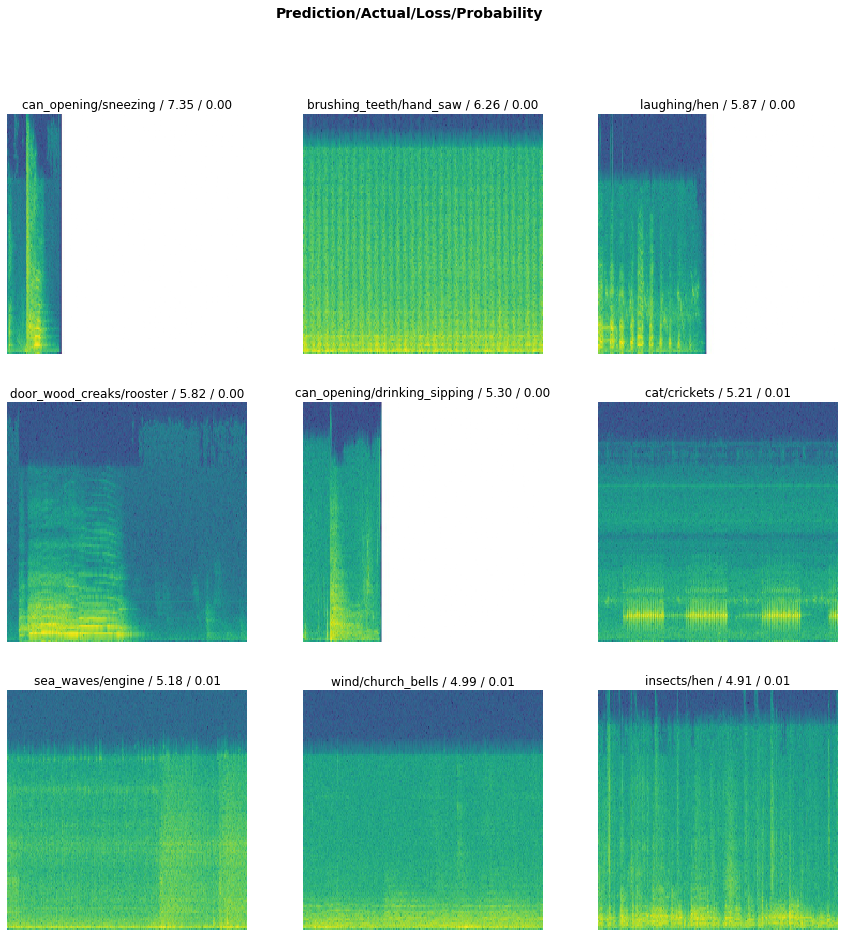

In [80]:
interp = ClassificationInterpretation.from_learner(learner_model)
interp.plot_top_losses(9, figsize=(15,15))